





  0%|          | 0/12 [00:00<?, ?it/s]





  8%|▊         | 1/12 [01:26<15:51, 86.53s/it]





 17%|█▋        | 2/12 [02:52<14:24, 86.44s/it]





 25%|██▌       | 3/12 [04:20<13:00, 86.77s/it]





 33%|███▎      | 4/12 [05:50<11:42, 87.84s/it]





 42%|████▏     | 5/12 [07:21<10:20, 88.61s/it]





 50%|█████     | 6/12 [08:52<08:56, 89.34s/it]





 58%|█████▊    | 7/12 [10:22<07:28, 89.78s/it]





 67%|██████▋   | 8/12 [11:53<05:59, 89.90s/it]





 75%|███████▌  | 9/12 [13:22<04:29, 89.73s/it]





 83%|████████▎ | 10/12 [13:59<02:27, 73.84s/it]





 92%|█████████▏| 11/12 [15:34<01:20, 80.19s/it]





100%|██████████| 12/12 [17:32<00:00, 91.58s/it]











  0%|          | 0/2 [00:00<?, ?it/s]





 50%|█████     | 1/2 [01:29<01:29, 89.12s/it]





100%|██████████| 2/2 [02:58<00:00, 89.12s/it]







Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.9190 - acc: 0.7322 - val_loss: 0.3708 - val_acc: 0.9041
Epoch 2/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.8158 - acc: 0.7554 - val_loss: 0.3500 - val_acc: 0.9414
Epoch 3/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.7933 - acc: 0.7599 - val_loss: 0.2407 - val_acc: 0.9747
Epoch 4/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.7778 - acc: 0.7626 - val_loss: 0.2394 - val_acc: 0.9695
Epoch 5/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.7628 - acc: 0.7643 - val_loss: 0.2856 - val_acc: 0.9614
Epoch 6/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.7516 - acc: 0.7644 - val_loss: 0.2489 - val_acc: 0.9714
Epoch 7/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.7407 - acc: 0.7670 - val_loss: 0.3070 - 

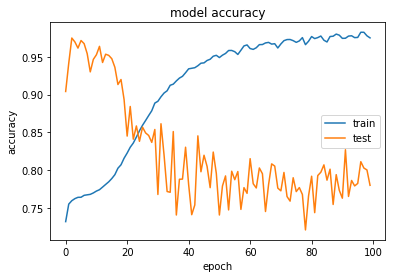

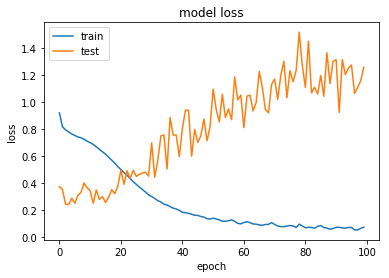

precision: [0.55128205 0.98225602 0.97131682 0.97248804 0.9908377  0.55781359
 0.99076517 0.5157385  0.98696219 0.97757256]
recall: [0.817 0.775 0.745 0.813 0.757 0.796 0.751 0.852 0.757 0.741]
fscore: [0.65834005 0.86640581 0.84323713 0.88562092 0.85827664 0.65595385
 0.85437998 0.64253394 0.85681947 0.84300341]
support: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [17]:
import numpy as np
import os 
import cv2 as cv
import keras
import imageio
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from google.colab import files
from tqdm import tqdm
from keras import models , regularizers, layers, losses
from random import shuffle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import load_img,img_to_array

np.random.seed(seed=0) #Constant Seed at 0

def shuffleData(Data,Labels): #This is for shuffeling data
    m=Data.shape[0]
    permutation=list(np.random.permutation(m))
    Data=Data[permutation, :, :]
    Labels=Labels[permutation]
    return Data, Labels
  
def PlotModelGraph(Model_History):  #This is for plotting the model after its done
    print(Model_History.history.keys())
    #Plot the accuracy
    plt.plot(Model_History.history['acc'])
    plt.plot(Model_History.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    #Plot the loss
    plt.plot(Model_History.history['loss'])
    plt.plot(Model_History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    return

get_ipython().system_raw("unrar x MAHDBase_TrainingSet.rar")  #Extracting the .rar files
get_ipython().system_raw("unrar x MAHDBase_TestingSet.rar")   #Extracting the .rar files


Training_Data = []
Training_Labels = []
Test_Data = []
Test_Labels = []

#----------------------------------Reading and labelling the data-----------------------------
for i in tqdm(range(1, len(os.listdir('./MAHDBase_TrainingSet')) + 1)):
  if(i<10):
    for j in range((len(os.listdir('./MAHDBase_TrainingSet' + '/Part0' + str(i))))):

      if '.bmp' in str(os.listdir('./MAHDBase_TrainingSet' + '/Part0' + str(i))[j]):
        path = './MAHDBase_TrainingSet' + '/Part0' + str(i)
        image = imageio.imread(os.path.join(path, os.listdir('./MAHDBase_TrainingSet' + '/Part0' + str(i))[j]), as_gray=True)
        Training_Data.append(image)
        for k in range(10):
          if 'digit' + str(k) in str(os.listdir('./MAHDBase_TrainingSet' + '/Part0' + str(i))[j]):
            Training_Labels.append(k)
            break
            
  else:
    for l in range((len(os.listdir('./MAHDBase_TrainingSet' + '/Part' + str(i))))):
       if '.bmp' in str(os.listdir('./MAHDBase_TrainingSet' + '/Part' + str(i))[l]):
          path = './MAHDBase_TrainingSet' + '/Part' + str(i)
          image = imageio.imread(os.path.join(path, os.listdir('./MAHDBase_TrainingSet' + '/Part' + str(i))[l]), as_gray=True)
          Training_Data.append(image)
          for k in range(10):
            if 'digit' + str(k) in str(os.listdir('./MAHDBase_TrainingSet' + '/Part' + str(i))[j]):
              Training_Labels.append(k)
              break
          
          

for i in tqdm(range(1, len(os.listdir('./MAHDBase_TestingSet')) + 1)):
  for j in range((len(os.listdir('./MAHDBase_TestingSet' + '/Part0' + str(i))))):
    if '.bmp' in str(os.listdir('./MAHDBase_TestingSet' + '/Part0' + str(i))[j]):
      path = './MAHDBase_TestingSet' + '/Part0' + str(i)
      image = imageio.imread(os.path.join(path, os.listdir('./MAHDBase_TestingSet' + '/Part0' + str(i))[j]), as_gray=True)
      Test_Data.append(image)
      for k in range(10):
            if 'digit' + str(k) in str(os.listdir('./MAHDBase_TestingSet' + '/Part0' + str(i))[j]):
              Test_Labels.append(k)
              break
#---------------------------------------------------------------------------------------------------      

Training_Data = np.array(Training_Data)
Training_Labels = np.array(Training_Labels)
Test_Data = np.array(Test_Data)
Test_Labels = np.array(Test_Labels)

Training_Data = Training_Data.reshape(60000, 28, 28, 1)  #Making sure shapes are correct
Test_Data = Test_Data.reshape(10000, 28, 28, 1)          #Making sure shapes are correct

Shuffled_Training_Data, Shuffled_Training_Labels = shuffleData(Training_Data, Training_Labels)      #Shuffeling data
Shuffled_Test_Data, Shuffled_Test_Labels = shuffleData(Test_Data, Test_Labels)                      #Shuffeling data

Training_Labels = to_categorical(Shuffled_Training_Labels)
Test_Labels = to_categorical(Shuffled_Test_Labels)
#---------------------------------Model--------------------------------------------------------
model = Sequential()
model.add(layers.Conv2D(12, kernel_size= 5, strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Conv2D(32, kernel_size= 5, strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Conv2D(120, kernel_size= 5, strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
#----------------------------------------------------------------------------------------------
#Optimizers experimenting with
Adam_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
SGD = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
RMSP = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss= losses.mean_squared_error, optimizer= RMSP, metrics=["accuracy"])    #Compiling model
History = model.fit(Shuffled_Training_Data, Training_Labels, epochs=100, batch_size=128, validation_data=(Shuffled_Test_Data, Test_Labels), verbose=1)   #Training the model
PlotModelGraph(History) #Plotting

Predicted_Classes = model.predict_classes(Shuffled_Test_Data, verbose=0)   #Getting scores

precision, recall, fscore, support = score(Shuffled_Test_Labels, Predicted_Classes)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))